In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA

## read all tables

In [2]:
df_transaction = pd.read_csv('transaction_dat.csv')
df_category = pd.read_csv('category_ref.csv')
df_account = pd.read_csv('account_dat.csv')
df_device = pd.read_csv('device_ref.csv')
df_inapp = pd.read_csv('in-app_dat.csv')
df_app = pd.read_csv('app_dat.csv')

## union and create the mappingtable

In [3]:
df_inapp2 = df_inapp.rename(columns={'parent_app_content_id':'app_id'})
df_inapp2['type_of_id'] = 'in-app_id'

In [4]:
df_app['app_id'] = df_app['content_id']
df_app['type_of_id'] = 'app_id'

In [5]:
df_mappingtable = pd.concat([df_app, df_inapp2]).drop(['app_name', 'category_id', 'device_id'],axis=1).fillna('download')
df_mappingtable = df_mappingtable.rename(columns={'type':'purchasetype'})

## join and create the mappingtable2

In [6]:
df_mappingtable2 = pd.merge(df_mappingtable, df_app, how="left", left_on="app_id", right_on="content_id")
df_mappingtable2 = df_mappingtable2.drop(columns=['app_name', 'content_id_y']).rename(columns={'content_id_x':'content_id'})

## join and create the mappingtable3

In [7]:
df_mappingtable3 = pd.merge(df_mappingtable2, df_device, how="left", on="device_id")

## join and create the mappingtable4

In [8]:
df_mappingtable4 = pd.merge(df_mappingtable3, df_category, how="left", on="category_id")
df_mappingtable4 = df_mappingtable4.drop(columns=['category_id', 'device_id'])

## join and create the df_transaction2

In [9]:
df_account = df_account.rename(columns={'create_dt':'acct_dt'})
df_transaction2 = pd.merge(df_transaction, df_account, how="left", on="acct_id")

## join and create the df_finaltable, sort by acct_id, transfer the create_dt and acct_dt to datetime

In [10]:
import calendar
df_finaltable = pd.merge(df_transaction2, df_mappingtable4, how="left", on="content_id")
df_finaltable = df_finaltable.drop(columns=['app_id_y', 'type_of_id_y']).rename(columns={'app_id_x':'app_id', 'type_of_id_x':'type_of_id'})
df_finaltable = df_finaltable.sort_values(by='acct_id').reset_index(drop=True)
df_finaltable['create_dt'] = pd.to_datetime(df_finaltable['create_dt'])
df_finaltable['acct_dt'] = pd.to_datetime(df_finaltable['acct_dt'])
df_finaltable

,create_dt,content_id,acct_id,price,device_id,acct_dt,payment_type,app_id,type_of_id,purchasetype,device_name,category_name
0,2016-09-21,883d445344e47d9a,00028709c8d435ff,0.0,1,2013-11-25,Free only,883d445344e47d9a,app_id,download,Both,Photos & Videos
1,2016-06-28,967849d3b9750b1e,00028709c8d435ff,0.0,2,2013-11-25,Free only,967849d3b9750b1e,app_id,download,iPad,Entertainment
2,2016-07-02,6469271dbcd00e9e,00028709c8d435ff,0.0,2,2013-11-25,Free only,6469271dbcd00e9e,app_id,download,Both,Photos & Videos
3,2016-07-09,967849d3b9750b1e,00028709c8d435ff,0.0,2,2013-11-25,Free only,967849d3b9750b1e,app_id,download,iPad,Entertainment
4,2016-08-08,f5b885ec1b869c8e,00028709c8d435ff,0.0,2,2013-11-25,Free only,f5b885ec1b869c8e,app_id,download,Both,Games
...,...,...,...,...,...,...,...,...,...,...,...,...
3607504,2016-09-01,b3aee7c1086c0237,ffffa8b018fa6ffd,0.0,2,2013-07-18,Free only,b3aee7c1086c0237,app_id,download,Both,Games
3607505,2016-09-04,f7a342a35d05df0c,ffffa8b018fa6ffd,0.0,1,2013-07-18,Free only,f7a342a35d05df0c,app_id,download,iPhone,Photos & Videos
3607506,2016-08-17,26172ccff1b49390,ffffa8b018fa6ffd,0.0,1,2013-07-18,Free only,26172ccff1b49390,app_id,download,Both,Social Networking
3607507,2016-07-16,dcaa9ca9e6096608,ffffa8b018fa6ffd,0.0,1,2013-07-18,Free only,dcaa9ca9e6096608,app_id,download,Both,Photos & Videos


In [11]:
df_finaltable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3607509 entries, 0 to 3607508
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   create_dt      datetime64[ns]
 1   content_id     object        
 2   acct_id        object        
 3   price          float64       
 4   device_id      int64         
 5   acct_dt        datetime64[ns]
 6   payment_type   object        
 7   app_id         object        
 8   type_of_id     object        
 9   purchasetype   object        
 10  device_name    object        
 11  category_name  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 330.3+ MB


## find total number of transaction by day

In [12]:
df_num_byday = df_finaltable[['create_dt', 'price']].copy()
df_num_byday['Date'] = df_num_byday['create_dt']
df_transaction_byday = df_num_byday.groupby('Date').size()
df_transaction_byday = pd.DataFrame({'Date':df_transaction_byday.index, 'Daily_num_transaction':df_transaction_byday.values})
df_transaction_byday

,Date,Daily_num_transaction
0,2016-06-01,31203
1,2016-06-02,31058
2,2016-06-03,30980
3,2016-06-04,32569
4,2016-06-05,32717
...,...,...
105,2016-09-17,35155
106,2016-09-18,35149
107,2016-09-19,33864
108,2016-09-20,33351


In [13]:
df_transaction_byday.loc[df_transaction_byday['Daily_num_transaction'].idxmax()]

Date                     2016-07-04 00:00:00
Daily_num_transaction                  36911
Name: 33, dtype: object

## find total transaction revenue by day

In [14]:
df_byday = df_finaltable[['create_dt', 'price']].copy()
df_byday['Date'] = df_byday['create_dt']
df_revenue_byday = df_byday.groupby('Date')
df_revenue_byday = df_revenue_byday['price'].apply(sum)
df_revenue_byday = pd.DataFrame({'Date':df_revenue_byday.index, 'Daily_revenue':df_revenue_byday.values})
df_revenue_byday

,Date,Daily_revenue
0,2016-06-01,169128.79
1,2016-06-02,167806.80
2,2016-06-03,169100.24
3,2016-06-04,179859.71
4,2016-06-05,182133.96
...,...,...
105,2016-09-17,181878.56
106,2016-09-18,182243.87
107,2016-09-19,170153.69
108,2016-09-20,167240.48


In [15]:
df_revenue_byday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           110 non-null    datetime64[ns]
 1   Daily_revenue  110 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [17]:
df_revenue_byday.loc[df_revenue_byday['Daily_revenue'].idxmax()]

Date             2016-07-04 00:00:00
Daily_revenue              216370.56
Name: 33, dtype: object

## create the df_customer_daysmax dataframe

In [18]:
import numpy as np

#add a new column of difference between create_dt and acct_dt, and then group by acct_id (customer)
df_finaltable['dt_difference'] = (df_finaltable['create_dt'] - df_finaltable['acct_dt']).astype('timedelta64[D]')

In [19]:
df_customer_days = df_finaltable.groupby("acct_id")
df_customer_days = df_customer_days["dt_difference"].apply(max)
df_customer_daysmax = pd.DataFrame({'Customer_id':df_customer_days.index, 'Register_days_until_transaction':df_customer_days.values})

## create the df_customer_device_counts dataframe

In [20]:
df_customer_device = df_finaltable.groupby("acct_id")
df_customer_device = df_customer_device["device_id"].apply(list)

In [21]:
iPhone = []
iPad = []
for i in range(len(df_customer_device)):
    iPhone.append(df_customer_device.values[i].count(1))
    iPad.append(df_customer_device.values[i].count(2))
    
df_customer_device_counts = pd.DataFrame(data = [df_customer_device.index, iPhone, iPad]).transpose()
df_customer_device_counts.columns = ['Customer_id', 'num_trans_iPhone', 'num_trans_iPad']

## create the df_customer_device_revenue dataframe

In [22]:
df_device_category = df_finaltable.groupby(by = ["acct_id", "device_id"])
df_device_category = df_device_category["price"].apply(sum)

In [23]:
df_customer_device_revenue = df_device_category.unstack(level=1)
df_customer_device_revenue.reset_index(inplace=True)
cols = {'acct_id':'Customer_id', 1:'iPhone_Revenue', 2:'iPad_Revenue'}
df_customer_device_revenue.rename(columns=cols, inplace=True)

## create the df_customer_category_counts dataframe

In [24]:
df_customer_category = df_finaltable.groupby("acct_id")
df_customer_category = df_customer_category["category_name"].apply(list)

In [25]:
E = []
G = []
PV = []
SN = []
U = []
TOTAL = []
for i in range(len(df_customer_category)):
    E.append(df_customer_category.values[i].count('Entertainment'))
    G.append(df_customer_category.values[i].count('Games'))
    PV.append(df_customer_category.values[i].count('Photos & Videos'))
    SN.append(df_customer_category.values[i].count('Social Networking'))
    U.append(df_customer_category.values[i].count('Utilities'))
    TOTAL.append(len(df_customer_category.values[i]))
    
df_customer_category_counts = pd.DataFrame(data = [df_customer_category.index, E, G, PV, SN, U, TOTAL]).transpose()
df_customer_category_counts.columns = ['Customer_id', 'num_trans_Entertainment', 'num_trans_Games', 'num_trans_Photos & Videos', 'num_trans_Social Networking', 'num_trans_Utilities', 'Total_num_of_transactions']

## create the df_customer_category_revenue dataframe

In [26]:
df_customer_category = df_finaltable.groupby(by = ["acct_id", "category_name"])
df_customer_category = df_customer_category["price"].apply(sum)

In [27]:
df_customer_category_revenue = df_customer_category.unstack(level=1)
df_customer_category_revenue.reset_index(inplace=True)
cols = {'acct_id':'Customer_id', 'Entertainment':'Entertainment_Revenue', 'Games':'Games_Revenue', 'Photos & Videos':'Photos & Videos_Revenue', 'Social Networking':'Social Networking_Revenue', 'Utilities':'Utilities_Revenue'}
df_customer_category_revenue.rename(columns=cols, inplace=True)

## create the df_customer_total_spending dataframe

In [28]:
df_customer_spending = df_finaltable.groupby("acct_id")
df_customer_spending = df_customer_spending["price"].apply(sum)

In [29]:
df_customer_category_total_spending = pd.DataFrame({'Customer_id':df_customer_spending.index, 'Total_Revenue':df_customer_spending.values})

## merge all customer dataframes into one

In [30]:
df_byCustomer = df_customer_daysmax.merge(df_customer_device_counts, on='Customer_id')
df_byCustomer = df_byCustomer.merge(df_customer_category_counts, on='Customer_id')
df_byCustomer = df_byCustomer.merge(df_customer_device_revenue, on='Customer_id')
df_byCustomer = df_byCustomer.merge(df_customer_category_revenue, on='Customer_id')
df_byCustomer = df_byCustomer.merge(df_customer_category_total_spending, on='Customer_id')
df_byCustomer = df_byCustomer.sort_values(by='Total_num_of_transactions', ascending=False).reset_index(drop=True)
df_byCustomer.set_index('Customer_id', inplace=True)
df_byCustomer['num_trans_iPhone'] = pd.to_numeric(df_byCustomer['num_trans_iPhone'], downcast="float")
df_byCustomer['num_trans_iPad'] = pd.to_numeric(df_byCustomer['num_trans_iPad'], downcast="float")
df_byCustomer['num_trans_Entertainment'] = pd.to_numeric(df_byCustomer['num_trans_Entertainment'], downcast="float")
df_byCustomer['num_trans_Games'] = pd.to_numeric(df_byCustomer['num_trans_Games'], downcast="float")
df_byCustomer['num_trans_Photos & Videos'] = pd.to_numeric(df_byCustomer['num_trans_Photos & Videos'], downcast="float")
df_byCustomer['num_trans_Social Networking'] = pd.to_numeric(df_byCustomer['num_trans_Social Networking'], downcast="float")
df_byCustomer['num_trans_Utilities'] = pd.to_numeric(df_byCustomer['num_trans_Utilities'], downcast="float")
df_byCustomer['Total_num_of_transactions'] = pd.to_numeric(df_byCustomer['Total_num_of_transactions'], downcast="float")

## normalize the dataframe

In [31]:
df_scaledByCustomer = df_byCustomer.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)

## distribution of Register_days_until_transaction

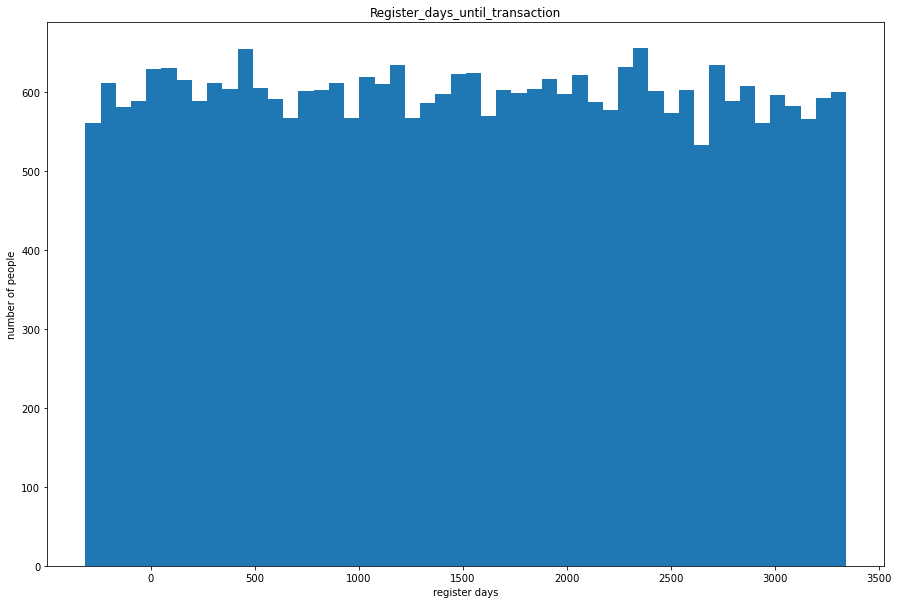

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
_ = plt.hist(df_byCustomer['Register_days_until_transaction'], bins=50)
plt.title(r'Register_days_until_transaction')
plt.xlabel(r'register days')
plt.ylabel(r'number of people')
plt.show()

## distribution of Total_num_of_transactions

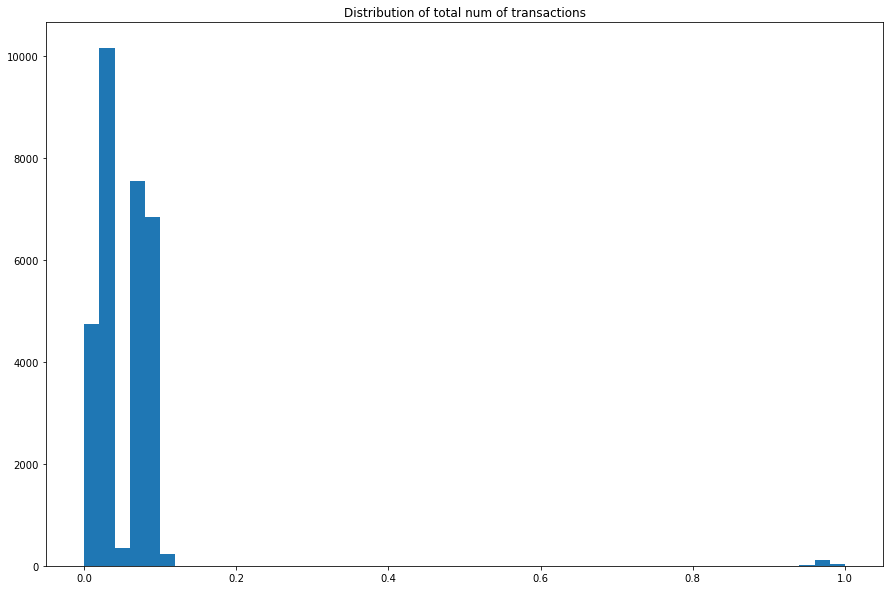

In [33]:
plt.figure(figsize=(15, 10))
_ = plt.hist(df_scaledByCustomer['Total_num_of_transactions'], bins=50)
plt.title(r'Distribution of total num of transactions')
plt.show()

## distribution of Total_Revenue

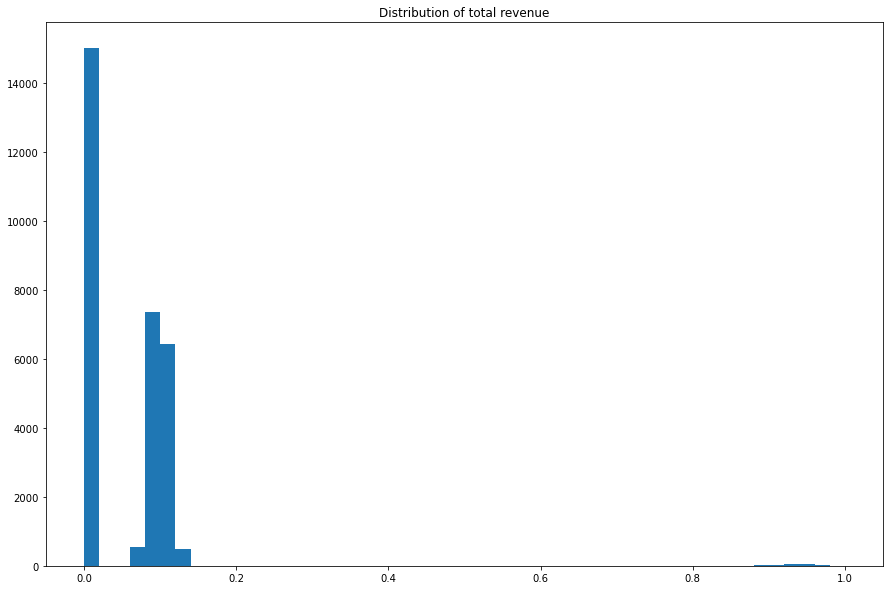

In [34]:
plt.figure(figsize=(15, 10))
_ = plt.hist(df_scaledByCustomer['Total_Revenue'], bins=50)
plt.title(r'Distribution of total revenue')
plt.show()

## Relationship between register days and number of transactions

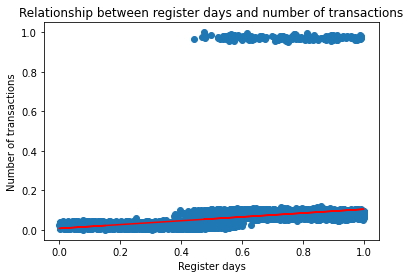

In [35]:
from sklearn.linear_model import LinearRegression
x = df_scaledByCustomer['Register_days_until_transaction'].values.reshape(-1, 1) 
y1 = df_scaledByCustomer['Total_num_of_transactions'].values.reshape(-1, 1) 
linear_regressor = LinearRegression()
linear_regressor.fit(x, y1)
y1_pred = linear_regressor.predict(x)
plt.scatter(x, y1)
plt.xlabel(r'Register days')
plt.ylabel(r'Number of transactions')
plt.title(r'Relationship between register days and number of transactions')
plt.plot(x, y1_pred, color='red')
plt.show()

## Relationship between register days and total revenue

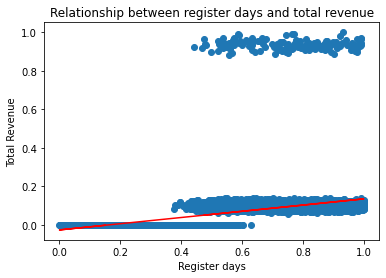

In [36]:
y2 = df_scaledByCustomer['Total_Revenue'].values.reshape(-1, 1) 
linear_regressor = LinearRegression()
linear_regressor.fit(x, y2)
y1_pred = linear_regressor.predict(x)
plt.scatter(x, y2)
plt.xlabel(r'Register days')
plt.ylabel(r'Total Revenue')
plt.title(r'Relationship between register days and total revenue')
plt.plot(x, y1_pred, color='red')
plt.show()

## Correlation matrix of the dataframe

In [37]:
df_corr = df_scaledByCustomer.corr()

## Pairplot of the correlation matrix

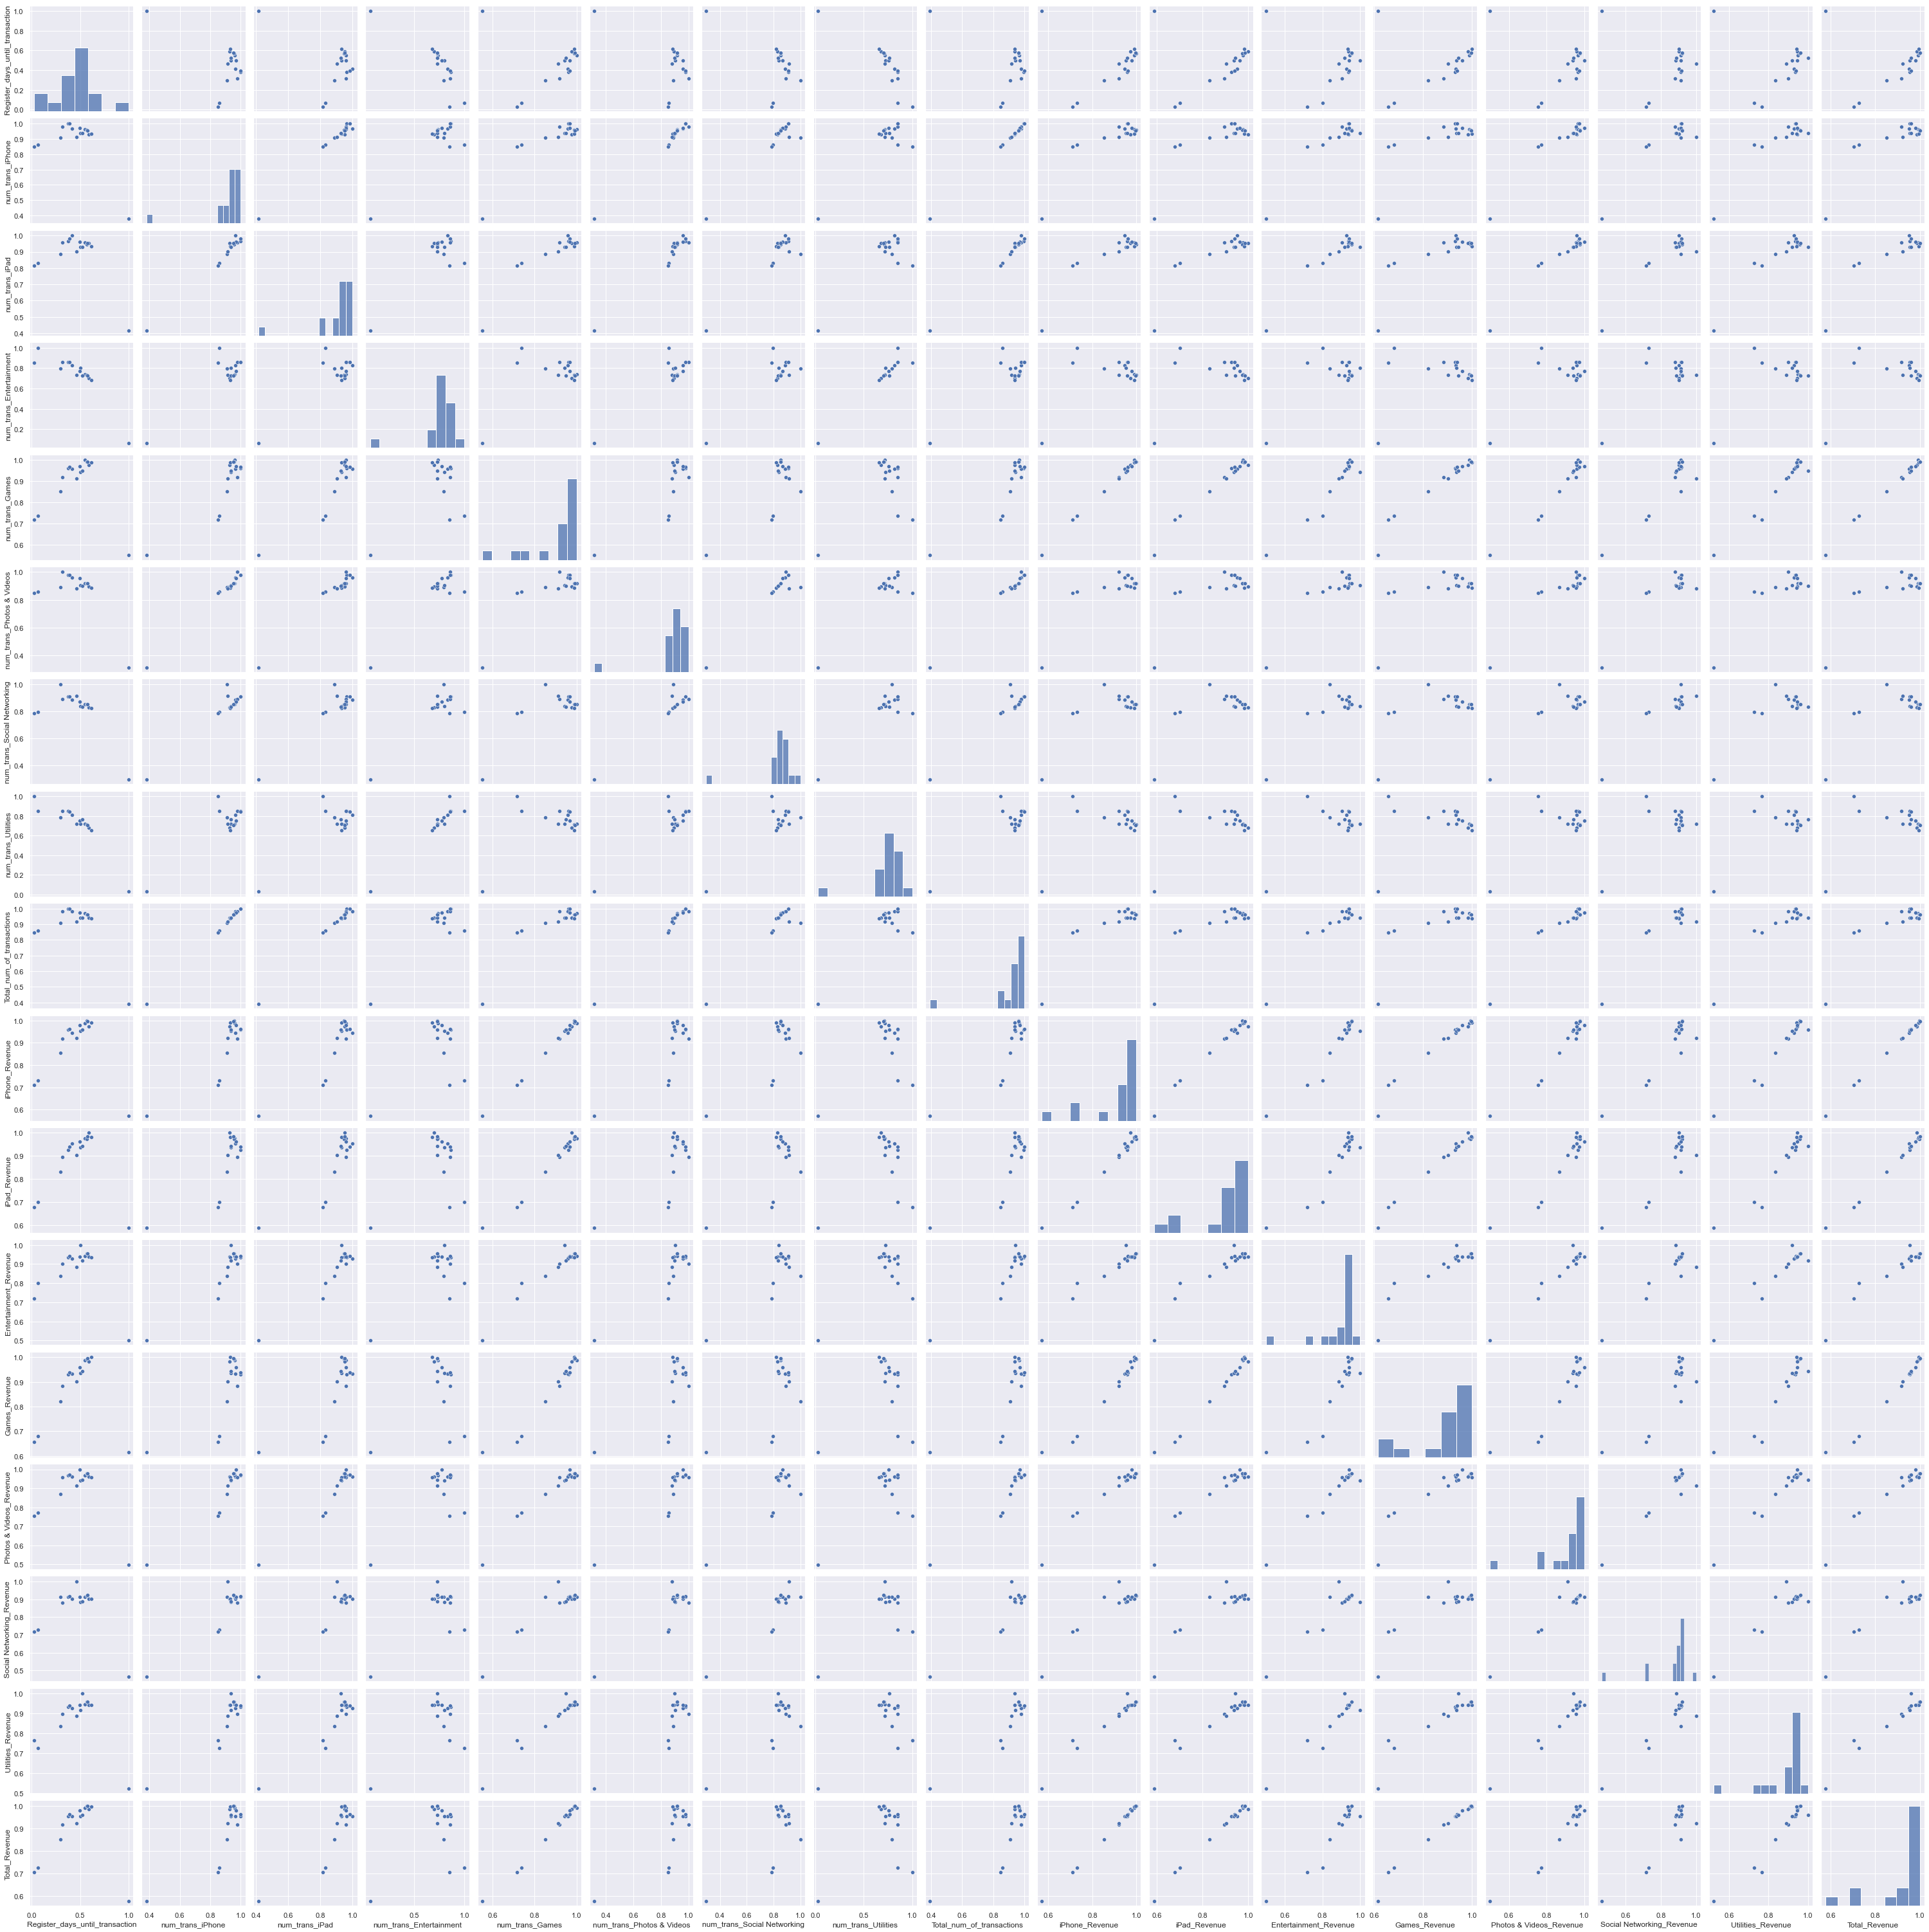

In [38]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.pairplot(df_corr)

## k-means clustering of the dataframe

## Run different clusters and see the output

In [39]:
df_2d = df_scaledByCustomer[['Total_num_of_transactions', 'Total_Revenue']]

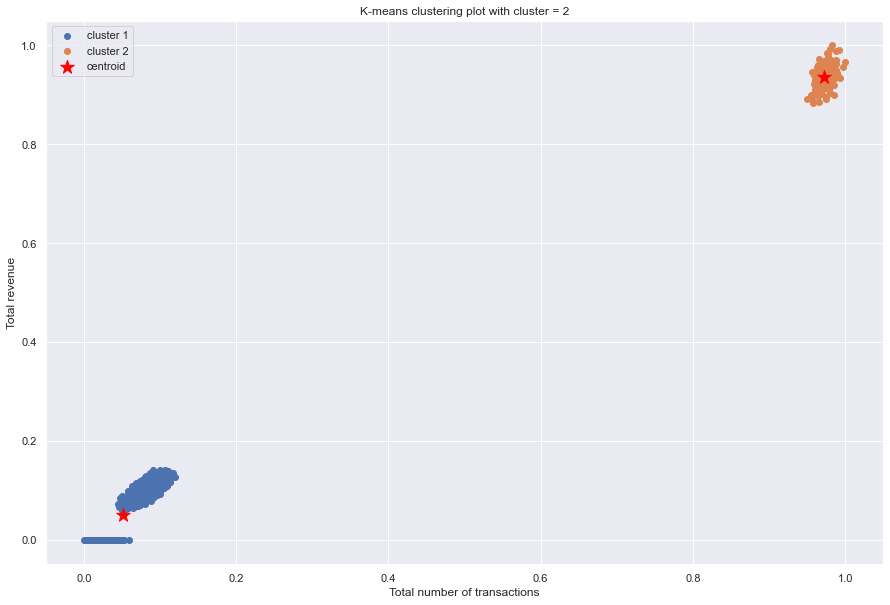

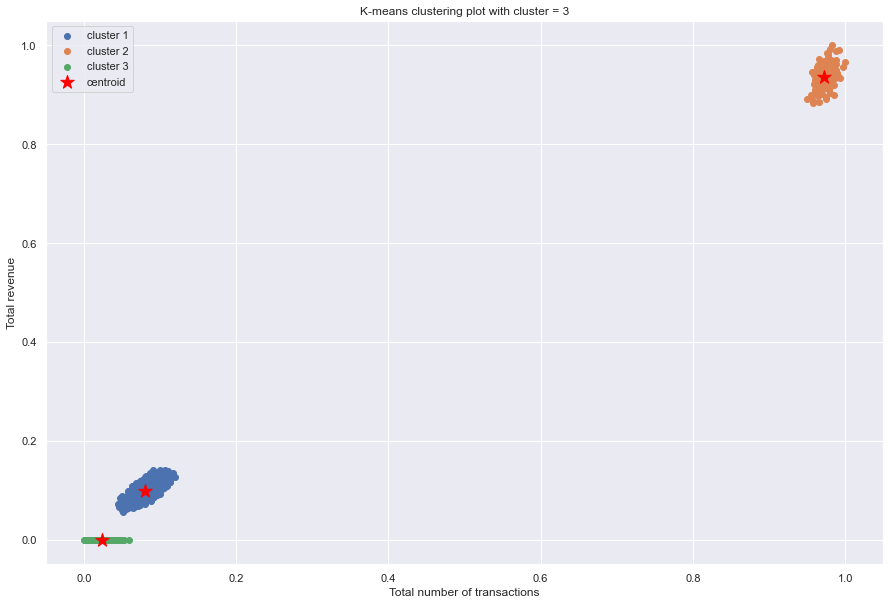

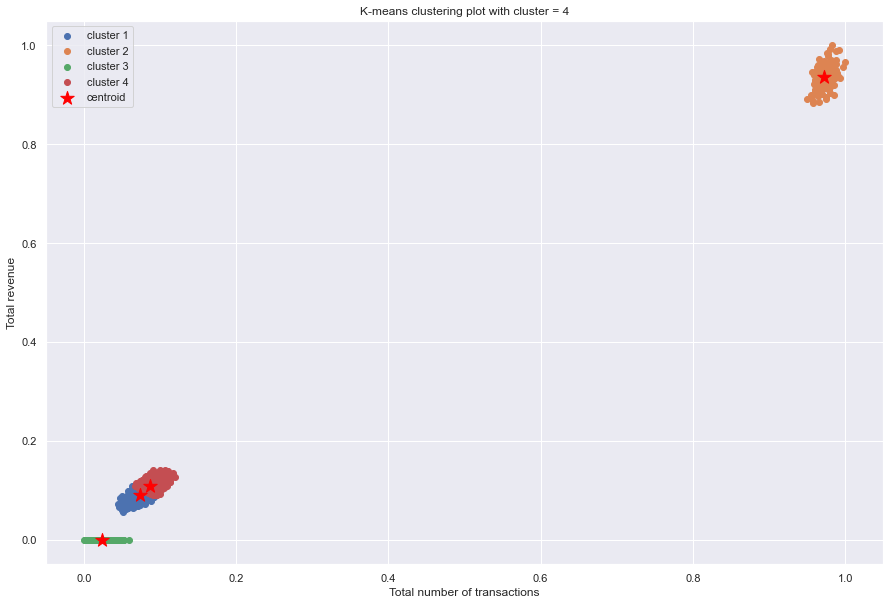

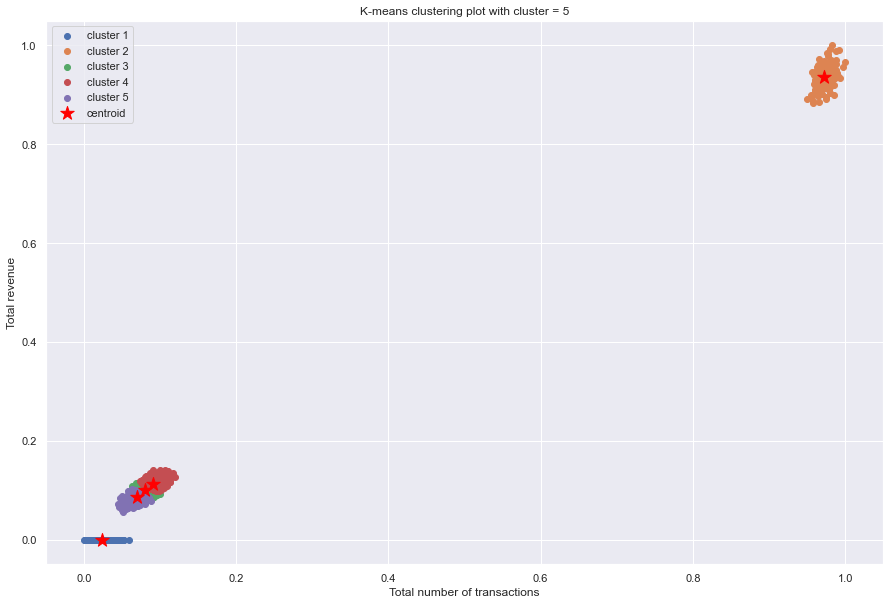

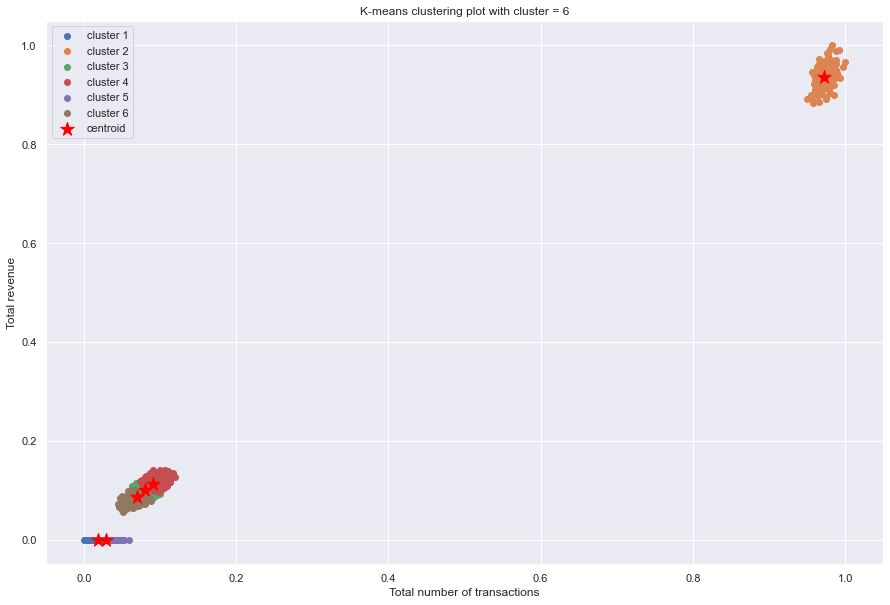

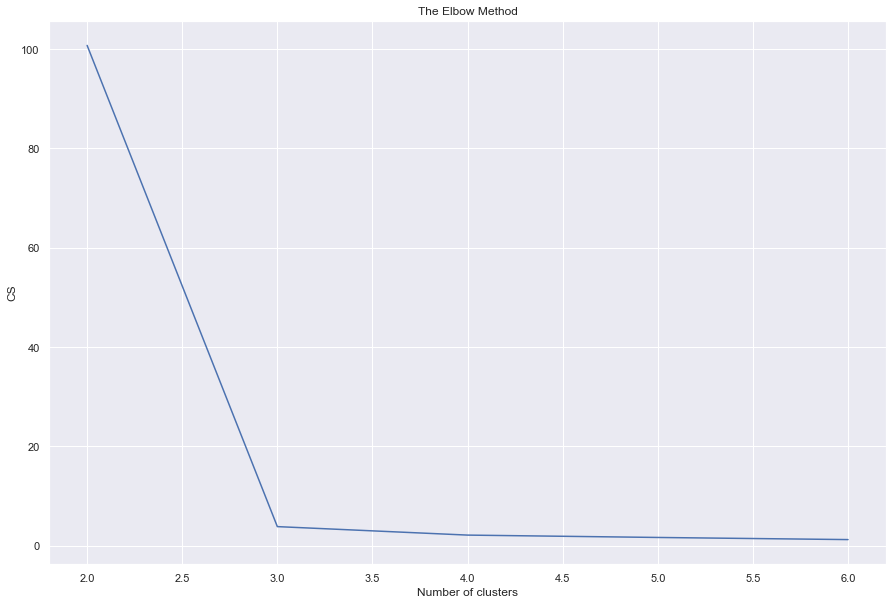

In [40]:
#find the optimal number of clusters
df_scaledByCustomer.fillna(0, inplace=True)
cs = []

for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_2d)
    cs.append(kmeans.inertia_)
    
    #predict the labels of clusters.
    label = kmeans.fit_predict(df_2d)
    
    #Getting unique labels
    u_labels = np.unique(label)
    centroids = kmeans.cluster_centers_
    
    #plotting the results:
    for i in u_labels:
        s = pd.Series(label == i, name='bools')
        plt.scatter(df_2d['Total_num_of_transactions'][s.values] , df_2d['Total_Revenue'][s.values] , label = ('cluster '+str(i+1)))
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'red', marker = '*', label = 'centroid')
    plt.title('K-means clustering plot with cluster = ' + str(i+1))
    plt.xlabel(r'Total number of transactions')
    plt.ylabel(r'Total revenue')
    plt.legend()
    plt.show()
plt.plot(range(2, 7), cs)
plt.title(r'The Elbow Method')
plt.xlabel(r'Number of clusters')
plt.ylabel(r'CS')
plt.show()

## Interpretation of clustering

The optimal number of clusters is 3 for this dataset.<br>
Cluster 1 denotes the customers who made some transactions and were willing to spend some budget on the apps, but not much. We can recommend more high-end and expensive products to them because they care more about the performance of the products.<br>
Cluster 2 denotes the customers who made a lot of transactions and paid more on the apps. We can recommend all activities to them because they seem to spend money on the products that they favor.<br>
Cluster 3 denotes the customers who made some transactions but were never willing to spend anything on the apps. They only use free apps or functions. We don't need to recommend high-end products to them since they never spend money on apps. They are comfortable with those self-contained free features.

## Choose to cluster into 3 groups

Name the three clusters: <br>
Gold Subscribers <br>
Silver Subscribers <br>
Bronze Subscribers <br>

[[ 7.94399771e-02  9.93100624e-02]
 [ 2.35719893e-02 -4.72538675e-15]
 [ 9.72645785e-01  9.35591087e-01]]


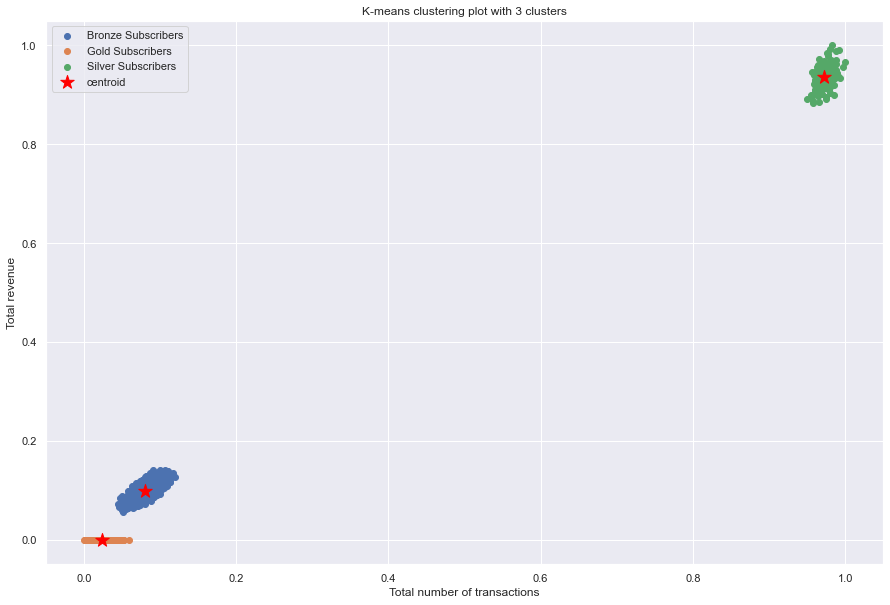

In [41]:
import random

random.seed(100)

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(df_2d)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_2d)

d = {0:'Bronze Subscribers', 1:'Gold Subscribers', 2:'Silver Subscribers'}
label = [d[x] for x in label]
#Getting unique labels
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
print(centroids)

#plotting the results:
for i in u_labels:
    s = []
    for e in label:
        if e == i:
            s.append(True)
        else:
            s.append(False)
    plt.scatter(df_2d['Total_num_of_transactions'][s] , df_2d['Total_Revenue'][s] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'red', marker = '*', label = 'centroid')
plt.title('K-means clustering plot with 3 clusters')
plt.xlabel(r'Total number of transactions')
plt.ylabel(r'Total revenue')
plt.legend()
plt.show()

In [42]:
#save the labels into original dataframe
df_scaledByCustomer_Clustered = df_byCustomer.copy()
df_scaledByCustomer_Clustered['Cluster'] = label
df_scaledByCustomer_Clustered

,Register_days_until_transaction,num_trans_iPhone,num_trans_iPad,num_trans_Entertainment,num_trans_Games,num_trans_Photos & Videos,num_trans_Social Networking,num_trans_Utilities,Total_num_of_transactions,iPhone_Revenue,iPad_Revenue,Entertainment_Revenue,Games_Revenue,Photos & Videos_Revenue,Social Networking_Revenue,Utilities_Revenue,Total_Revenue,Cluster
Customer_id,,,,,,,,,,,,,,,,,,
025488c9dcfdee47,1427.0,1000.0,356.0,150.0,613.0,368.0,77.0,148.0,1356.0,8364.06,3031.47,966.50,6887.96,2199.32,501.23,840.52,11395.53,Silver Subscribers
e2ea593fd4f17918,1946.0,1002.0,350.0,137.0,597.0,385.0,93.0,140.0,1352.0,8483.02,2807.54,978.63,6419.11,2494.15,569.07,829.60,11290.56,Silver Subscribers
8574c2b7af1573ac,2667.0,995.0,353.0,170.0,603.0,371.0,76.0,128.0,1348.0,8083.12,2930.49,1225.30,6244.06,2361.29,423.24,759.72,11013.61,Silver Subscribers
8422035186298ab9,2510.0,979.0,367.0,128.0,615.0,391.0,66.0,146.0,1346.0,8468.29,3222.37,907.72,6773.97,2669.09,443.34,896.54,11690.66,Silver Subscribers
d1a4bbaea275c06c,1749.0,956.0,388.0,141.0,607.0,397.0,58.0,141.0,1344.0,8018.53,3048.15,892.59,6698.05,2321.03,345.42,809.59,11066.68,Silver Subscribers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9bf18ca3a7bb0946,916.0,35.0,15.0,6.0,26.0,11.0,0.0,7.0,50.0,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,Gold Subscribers
eb795306ffd01ab5,701.0,38.0,12.0,9.0,17.0,8.0,3.0,13.0,50.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Gold Subscribers
0d50bb7804cf26b1,795.0,35.0,14.0,12.0,17.0,6.0,1.0,13.0,49.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Gold Subscribers


In [ ]:
df_scaledByCustomer_Clustered['Cluster'].value_counts()

In [ ]:
df_scaledByCustomer_Clustered.groupby(['Cluster']).mean()

## Group by clusters and see if there's any insight

In [ ]:
df_scaledByCustomer_Clustered.groupby(['Cluster']).sum()

## Principle Component Analysis (PCA)

Since we have already standardized the dataset, we now find the convariance matrix for the data, calculate the eigenvalues, eigenvectors, and find the optimal principle components and plot.

In [ ]:
df_scaledByCustomer

In [ ]:
#covariance matrix
df_cov = df_scaledByCustomer.cov()

In [ ]:
#eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(df_cov)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [ ]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
pca = PCA(n_components=3)
pca.fit_transform(df_scaledByCustomer)
print(pca.explained_variance_ratio_)

In [ ]:
#select a subset from the sorted eigenvalues
n_components=2 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
eigenvector_subset

In [ ]:
#dimension-reduced dataframe
array_pca = np.dot(eigenvector_subset.transpose(), df_scaledByCustomer.values.transpose()).transpose()
df_pca = pd.DataFrame(array_pca, columns=['pc1', 'pc2'])
df_pca

In [ ]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, method='principal', rotation="varimax")
fa.fit(df_scaledByCustomer)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

fa.loadings_

PC1 (Factor1): num_trans_iPhone, num_trans_iPad, num_trans_Entertainment, num_trans_Games, num_trans_Photos & Videos, num_trans_Social Networking, num_trans_Utilities, Total_num_of_transactions, iPhone_Revenue, iPad_Revenue, Entertainment_Revenue, Games_Revenue, Photos & Videos_Revenue, Social Networking_Revenue, Utilities_Revenue, Total_Revenue <br>
PC2 (Factor2): Register_days_until_transaction, num_trans_iPhone, num_trans_iPad, num_trans_Games, iPhone_Revenue, iPad_Revenue, Entertainment_Revenue, Games_Revenue, Photos & Videos_Revenue, Social Networking_Revenue, Utilities_Revenue, Total_Revenue